In [222]:
# Michaela Webster's Thesis Project #
""" This project aims to try to predict the outcome of security clearance appeals cases """

#use this link for scikit learn help: https://www.ritchieng.com/pandas-scikit-learn/

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# imports
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import shlex
import sklearn
from sklearn import metrics as skmet

In [217]:
#open drugs_query.csv as pandas dataframe - encoding must be latin-1
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\drugs_query.csv"
data = pd.read_csv(path_to_file, encoding='latin-1')

df = data.groupby(['Drugs', 'Denied']).size()
#print bar graph of drugs yes/no vs denied yes/no
print (df)

Drugs  Denied
False  False     8785
       True      9518
True   False      867
       True      1344
dtype: int64


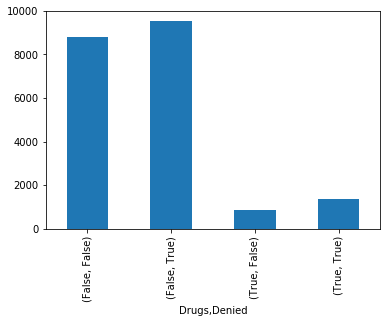

In [218]:
#print bar graph to show drugs/denied
#cannot do this through cmd
df.plot.bar()

*** DRUG COUNTS ***
marijuana:  1431
meth:  44
cocaine:  125
heroin:  8
painkillers:  6
LSD:  1
Shrooms:  2

*** Drug Usage ***
drug abuse:  124
prescription:  33


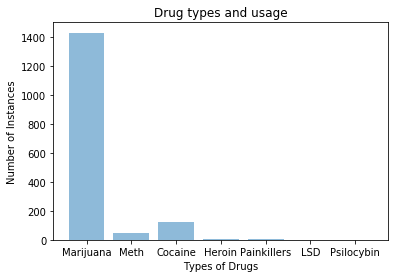

In [219]:
#print out the count for drug types
data.Judgment.head(3)
#sort through the judgment field
marijuana = 0
cocaine = 0
meth = 0
heroin = 0
painkiller = 0
lsd = 0
shrooms = 0
drug_abuse = 0
prescrip = 0

#go through each row 
for i in data['Judgment']:
        if 'marijuana' in i :
            marijuana = marijuana+1
        elif 'meth' in i:
            meth = meth+1
        elif 'cocaine' in i:
            cocaine = cocaine+1
        elif 'heroin' in i:
            heroin = heroin+1
        elif 'painkiller' in i:
            painkiller = painkiller+1
        elif 'LSD' in i:
            lsd = lsd+1
        elif 'psilocybin' in i:
            shrooms = shrooms+1
        elif 'drug abuse' in i:
            drug_abuse = drug_abuse+1
        elif 'prescription' in i:
            prescrip = prescrip+1
      
print('*** DRUG COUNTS ***')
print('marijuana: ', marijuana)
print('meth: ', meth)
print('cocaine: ', cocaine)
print('heroin: ', heroin)
print('painkillers: ', painkiller)
print('LSD: ', lsd)
print('Shrooms: ', shrooms)

print('\n*** Drug Usage ***')
print('drug abuse: ', drug_abuse)
print('prescription: ', prescrip)

x=['Marijuana', 'Meth', 'Cocaine', 'Heroin', 'Painkillers', 'LSD', 'Psilocybin']
y=[marijuana,meth,cocaine,heroin,painkiller,lsd,shrooms]

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('Types of Drugs')
plt.ylabel('Number of Instances')
plt.title('Drug types and usage')
 
plt.show()

In [220]:
# set the featured columns for X (Drugs)
feature_cols = ['Drugs']
# you want all rows, and the feature_cols' columns
X = data.loc[:, feature_cols]
# now we want to create our response vector
y = data.Denied

In [221]:
# START DOING MACHINE LEARNING STUFF
# 1. import
from sklearn.linear_model import LogisticRegression
# 2. instantiate model
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
# 3. fit 
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [224]:
# FOR TEST DATA
#open drugs_test.csv as pandas dataframe
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\drugs_test.csv"
data2 = pd.read_csv(path_to_file, encoding='latin-1')
X_new = data.loc[:, feature_cols]
new_pred_class = logreg.predict(X_new)

In [225]:
new_pred_class

array([ True,  True,  True, ...,  True,  True,  True])

In [226]:
drugs_accuracy = skmet.accuracy_score(new_pred_class, y)

In [227]:
print('Accuracy Score for Drugs model: ',drugs_accuracy)

Accuracy Score for Drugs model:  0.5294920542068831
